In [9]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='3'
from tensorflow import keras
from matplotlib import pyplot as plt



Data Read Done!
Training X Size : (50000, 32, 32, 3)
Training Y Size : (50000, 1)
Test X Size : (10000, 32, 32, 3)
Test Y Size : (10000, 1)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.4325 - loss: 1.5736 - val_accuracy: 0.5405 - val_loss: 1.3140
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6337 - loss: 1.0360 - val_accuracy: 0.4683 - val_loss: 1.5746
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6937 - loss: 0.8715 - val_accuracy: 0.6099 - val_loss: 1.2345
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7265 - loss: 0.7785 - val_accuracy: 0.6880 - val_loss: 0.8713
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7579 - loss: 0.6934 - val_accuracy: 0.7255 - val_loss: 0.7883
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7775 - loss: 0.6373 - val_accuracy: 0.7138 - val_loss: 0.8438
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step -

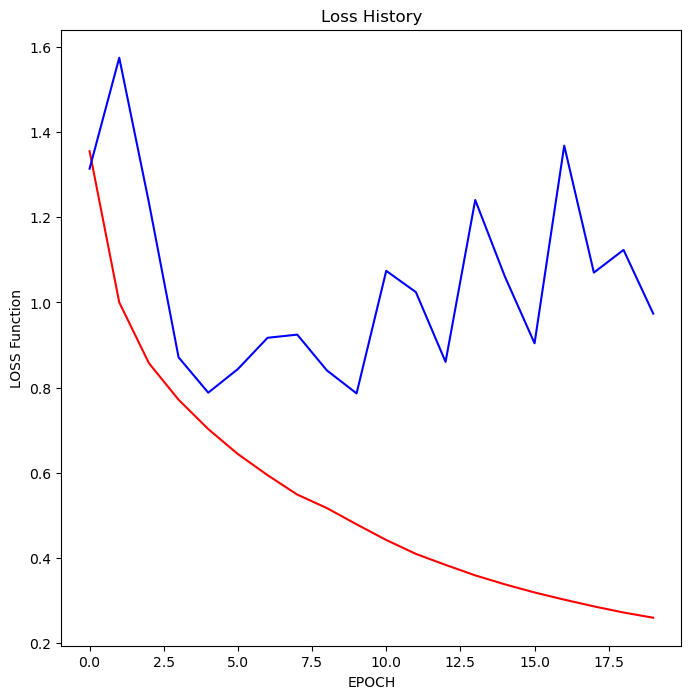

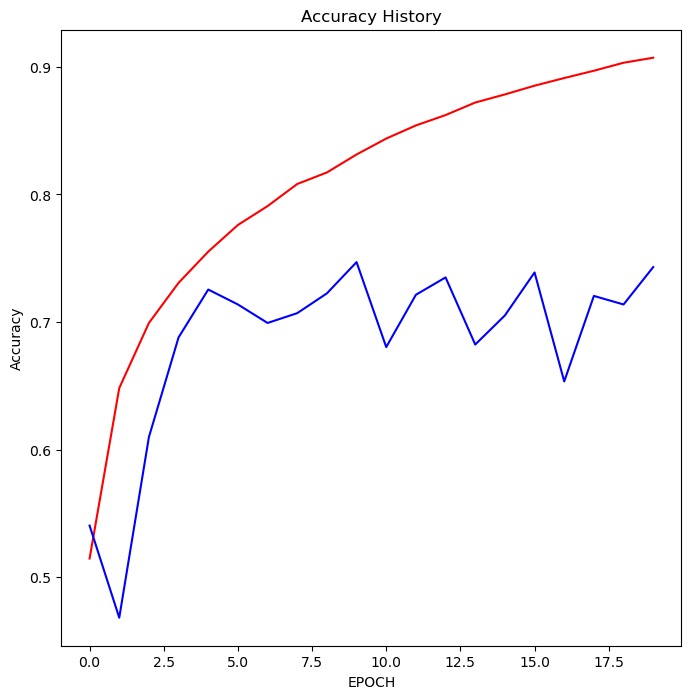

In [17]:
class DataReader:
    def __init__(self):
        self.label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
        self.cifar = keras.datasets.cifar10
        (self.train_X, self.train_Y), (self.test_X, self.test_Y) = self.cifar.load_data()

        self.train_X = self.preprocess(self.train_X)
        self.test_X = self.preprocess(self.test_X)
        
        print("\n\nData Read Done!")
        print("Training X Size : " + str(self.train_X.shape))
        print("Training Y Size : " + str(self.train_Y.shape))
        print("Test X Size : " + str(self.test_X.shape))
        print("Test Y Size : " + str(self.test_Y.shape) + '\n\n')
        
    def preprocess(self, images):
        return images / 255.0
    
dr = DataReader()

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=100,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")